In [390]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style

style.use('ggplot')


In [391]:
import os
os.getcwd()
os.chdir('C:\\Users\\desai\\Documents')

In [392]:
data=pd.read_csv("Hospital General Information.csv",encoding = "ISO-8859-1")

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [394]:
data['Hospital overall rating'].value_counts()

3                1761
Not Available    1245
4                 939
2                 678
1                 107
5                  82
Name: Hospital overall rating, dtype: int64

In [395]:
pd.to_numeric(data['Hospital overall rating'].replace("Not Available",0)).mean() 

2.2676641729010805

In [396]:
## Replacing the unknown ratings by the average rounded to integer
## Casting target variable to numeric for inferences via CausalNex(library requirement)
data['Hospital overall rating']=pd.to_numeric(data['Hospital overall rating'].replace("Not Available",2))

In [397]:
data['Hospital overall rating'].value_counts()

2    1923
3    1761
4     939
1     107
5      82
Name: Hospital overall rating, dtype: int64

In [398]:
data['Hospital Type'].value_counts()

Acute Care Hospitals         3369
Critical Access Hospitals    1344
Childrens                      99
Name: Hospital Type, dtype: int64

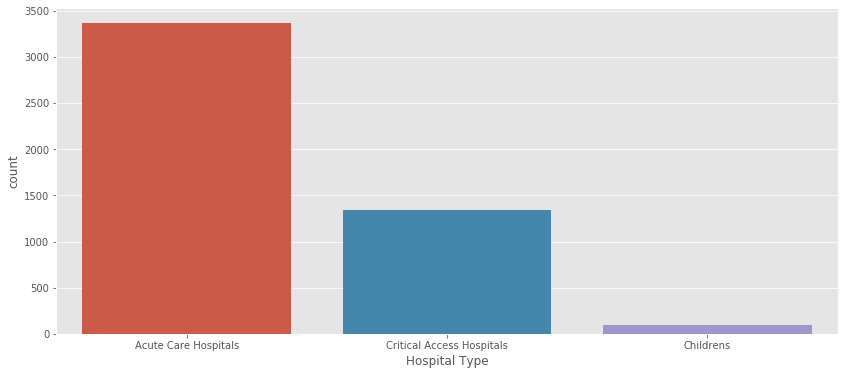

In [399]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x=data['Hospital Type'])

In [400]:
data['Hospital Ownership'].value_counts()

Voluntary non-profit - Private                 2052
Proprietary                                     800
Government - Hospital District or Authority     561
Voluntary non-profit - Other                    462
Government - Local                              407
Voluntary non-profit - Church                   343
Physician                                        68
Government - State                               65
Government - Federal                             45
Tribal                                            9
Name: Hospital Ownership, dtype: int64

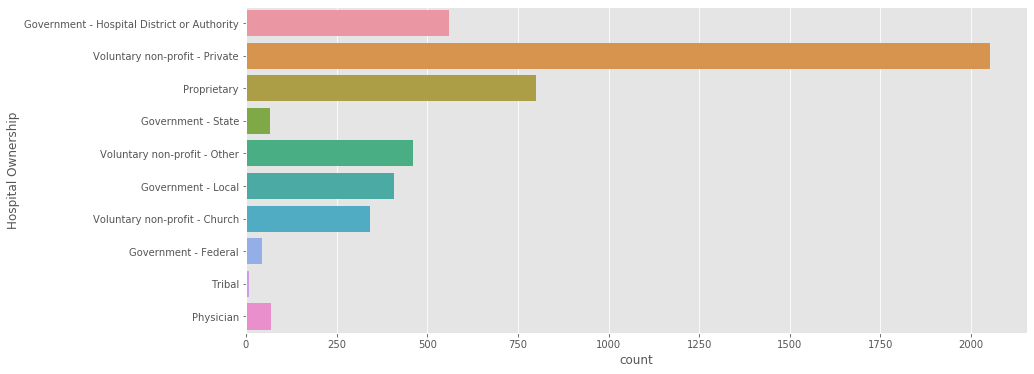

In [401]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,y=data['Hospital Ownership'],orient='h')

In [402]:
data['Emergency Services'].value_counts()

Yes    4497
No      315
Name: Emergency Services, dtype: int64

In [403]:
data['Hospital overall rating footnote'].value_counts()

There are too few measures or measure groups reported to calculate a star rating or measure group score                                        995
Data are shown only for hospitals that participate in the Inpatient Quality Reporting (IQR) and Outpatient Quality Reporting (OQR) programs    159
This hospitals star rating only includes data reported on inpatient services                                                                  153
Data suppressed by CMS for one or more quarters                                                                                                 49
Results are not available for this reporting period                                                                                             42
Name: Hospital overall rating footnote, dtype: int64

Dropping all the text data as footnotes do not affect hospital ratings

In [404]:
data.drop([x for x in data.columns if 'footnote' in x],axis=1,inplace=True)

In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Provider ID                                           4812 non-null   int64 
 1   Hospital Name                                         4812 non-null   object
 2   Address                                               4812 non-null   object
 3   City                                                  4812 non-null   object
 4   State                                                 4812 non-null   object
 5   ZIP Code                                              4812 non-null   int64 
 6   County Name                                           4797 non-null   object
 7   Phone Number                                          4812 non-null   int64 
 8   Hospital Type                                         4812 non-null 

I have not retained geographical indicators as my use case assumes homogenity of hospital characteristics for the entire USA

In [406]:
data.drop(['Provider ID','Hospital Name','Address','ZIP Code','County Name','Phone Number'],axis=1,inplace=True)


In [407]:
data.drop(['City','State'],axis=1,inplace=True)

In [408]:
data.info()
## only one column aka Meets criteria for meaningful use of Electronic Health Records has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Hospital Type                                         4812 non-null   object
 1   Hospital Ownership                                    4812 non-null   object
 2   Emergency Services                                    4812 non-null   object
 3   Meets criteria for meaningful use of EHRs             4669 non-null   object
 4   Hospital overall rating                               4812 non-null   int64 
 5   Mortality national comparison                         4812 non-null   object
 6   Safety of care national comparison                    4812 non-null   object
 7   Readmission national comparison                       4812 non-null   object
 8   Patient experience national comparison                4812 non-null 

In [409]:
data['Meets criteria for meaningful use of EHRs'].fillna('N',inplace=True)

In [410]:
data['Meets criteria for meaningful use of EHRs'].value_counts()

Y                4668
N                 143
Not Available       1
Name: Meets criteria for meaningful use of EHRs, dtype: int64

In [411]:
data['Meets criteria for meaningful use of EHRs'].replace('Not Available','N',inplace=True)

In [412]:
data['Meets criteria for meaningful use of EHRs'].value_counts()

Y    4668
N     144
Name: Meets criteria for meaningful use of EHRs, dtype: int64

In [413]:
data['Readmission national comparison'].value_counts()

Same as the national average    2119
Not Available                   1017
Below the national average       866
Above the national average       810
Name: Readmission national comparison, dtype: int64

In [414]:
data['Readmission national comparison'].replace("Not Available","Same as the national average" ,inplace=True)

In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Hospital Type                                         4812 non-null   object
 1   Hospital Ownership                                    4812 non-null   object
 2   Emergency Services                                    4812 non-null   object
 3   Meets criteria for meaningful use of EHRs             4812 non-null   object
 4   Hospital overall rating                               4812 non-null   int64 
 5   Mortality national comparison                         4812 non-null   object
 6   Safety of care national comparison                    4812 non-null   object
 7   Readmission national comparison                       4812 non-null   object
 8   Patient experience national comparison                4812 non-null 

In [416]:
data['Mortality national comparison'].value_counts()

Same as the national average    2719
Not Available                   1352
Above the national average       400
Below the national average       341
Name: Mortality national comparison, dtype: int64

In [417]:
data['Mortality national comparison'].replace("Not Available","Same as the national average" ,inplace=True)

In [418]:
data['Mortality national comparison'].value_counts()

Same as the national average    4071
Above the national average       400
Below the national average       341
Name: Mortality national comparison, dtype: int64

In [419]:
data['Safety of care national comparison'].value_counts()

Not Available                   2168
Same as the national average    1194
Above the national average       786
Below the national average       664
Name: Safety of care national comparison, dtype: int64

In [420]:
data['Safety of care national comparison'].replace("Not Available","Same as the national average" ,inplace=True)

In [421]:
data['Safety of care national comparison'].value_counts()

Same as the national average    3362
Above the national average       786
Below the national average       664
Name: Safety of care national comparison, dtype: int64

In [422]:
data['Patient experience national comparison'].replace("Not Available","Same as the national average" ,inplace=True)

In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Hospital Type                                         4812 non-null   object
 1   Hospital Ownership                                    4812 non-null   object
 2   Emergency Services                                    4812 non-null   object
 3   Meets criteria for meaningful use of EHRs             4812 non-null   object
 4   Hospital overall rating                               4812 non-null   int64 
 5   Mortality national comparison                         4812 non-null   object
 6   Safety of care national comparison                    4812 non-null   object
 7   Readmission national comparison                       4812 non-null   object
 8   Patient experience national comparison                4812 non-null 

For the remaining metrics

In [424]:
for x in data.columns[8:13]:
    data[x].replace("Not Available","Same as the national average" ,inplace=True)

In [425]:
for x in data.columns[8:13]:
     print(data[x].value_counts())

Same as the national average    2517
Above the national average      1214
Below the national average      1081
Name: Patient experience national comparison, dtype: int64
Same as the national average    4440
Below the national average       242
Above the national average       130
Name: Effectiveness of care national comparison, dtype: int64
Same as the national average    2820
Above the national average      1088
Below the national average       904
Name: Timeliness of care national comparison, dtype: int64
Same as the national average    4084
Below the national average       370
Above the national average       358
Name: Efficient use of medical imaging national comparison, dtype: int64


In [426]:
from sklearn.preprocessing import LabelEncoder

non_numeric_columns = list(data.select_dtypes(exclude=[np.number]).columns)
Causal_data=data.copy()

In [427]:
le = LabelEncoder()
for col in non_numeric_columns:
    Causal_data[col] = le.fit_transform(Causal_data[col])

In [428]:
Causal_data.to_csv("CAUSAL_DATA.csv")

In [429]:
data=pd.get_dummies(data,columns=['Meets criteria for meaningful use of EHRs'],prefix='MEETSCRITERIA_',drop_first=True)

In [430]:
data['MEETSCRITERIA__Y'] ## 'MEETSCRITERIA__Y' Meets criteria for meaningful use of EHRs Yes or No? 1-Yes,0-No

0       1
1       1
2       1
3       1
4       1
       ..
4807    0
4808    1
4809    1
4810    0
4811    1
Name: MEETSCRITERIA__Y, Length: 4812, dtype: uint8

In [431]:
data=pd.get_dummies(data,columns=['Mortality national comparison'],prefix='MORTALITY_',drop_first=True)

In [432]:
data=pd.get_dummies(data,columns=['Safety of care national comparison'],prefix='SAFETY_',drop_first=True)

In [433]:
data=pd.get_dummies(data,columns=['Readmission national comparison'],prefix='READMISSION_',drop_first=True)

In [434]:
data=pd.get_dummies(data,columns=['Patient experience national comparison'],prefix='PATEXPERIENCE_',drop_first=True)

In [435]:
data=pd.get_dummies(data,columns=['Effectiveness of care national comparison'],prefix='EFFECTIVE_CARE_',drop_first=True)

In [436]:
data=pd.get_dummies(data,columns=['Timeliness of care national comparison'],prefix='TIMELINESS_CARE_',drop_first=True)

In [437]:
data=pd.get_dummies(data,columns=['Efficient use of medical imaging national comparison'],prefix='MEDICALIMAGING_',drop_first=True)

In [438]:
data=pd.get_dummies(data,columns=['Hospital Type'],prefix='HOSPITALTYPE_',drop_first=True)

In [439]:
data=pd.get_dummies(data,columns=['Hospital Ownership'],prefix='OWNERSHIP_',drop_first=True)

In [440]:
data=pd.get_dummies(data,columns=['Emergency Services'],prefix='EMERGENCYSERVICE_',drop_first=True)

In [441]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   Hospital overall rating                                 4812 non-null   int64
 1   MEETSCRITERIA__Y                                        4812 non-null   uint8
 2   MORTALITY__Below the national average                   4812 non-null   uint8
 3   MORTALITY__Same as the national average                 4812 non-null   uint8
 4   SAFETY__Below the national average                      4812 non-null   uint8
 5   SAFETY__Same as the national average                    4812 non-null   uint8
 6   READMISSION__Below the national average                 4812 non-null   uint8
 7   READMISSION__Same as the national average               4812 non-null   uint8
 8   PATEXPERIENCE__Below the national average               48

In [443]:
data.to_csv("PREPROCESSED_HOSPITAL_FIN2.csv")

In [310]:
X=data.drop(['Hospital overall rating'],axis=1)
y=data['Hospital overall rating']

In [315]:
import statsmodels.api as sm

In [445]:
Xc=sm.add_constant(X)

In [447]:
mlogit = sm.MNLogit(y, Xc)
fmlogit = mlogit.fit_regularized(maxiter=100000,trim_mode='auto')

print(fmlogit.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6896712481325246
            Iterations: 830
            Function evaluations: 830
            Gradient evaluations: 830
                             MNLogit Regression Results                            
Dep. Variable:     Hospital overall rating   No. Observations:                 4812
Model:                             MNLogit   Df Residuals:                     4700
Method:                                MLE   Df Model:                          108
Date:                     Sun, 08 Nov 2020   Pseudo R-squ.:                  0.4288
Time:                             00:41:00   Log-Likelihood:                -3318.7
converged:                            True   LL-Null:                       -5809.6
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                             Hospital overall rating=2       coef    std err          z      P>|z|      [0.025    

In [444]:
## Statistically significant interpretaion of Log- Likelihood ratios(Pr(Hosp_rating=5)/Pr(Hosp_rating=1)]) 

# base case Mortality above national average,safety above national average,readmission above national average,
# TIMELINESS_CARE above national average, MEDICALIMAGING__ above national average



#  Hospital overall rating=5                                 coef     std err       z         P>|z|      [0.025      0.975]
  
#MORTALITY__Same as the national average                   -7.5122      0.616    -12.186      0.000      -8.720      -6.304
#SAFETY__Below the national average                       -13.3176      0.998    -13.342      0.000     -15.274     -11.361
#SAFETY__Same as the national average                      -5.6483      0.665     -8.494      0.000      -6.952      -4.345
#READMISSION__Below the national average                  -16.5846      1.572    -10.548      0.000     -19.666     -13.503
#READMISSION__Same as the national average                 -9.2112      1.204     -7.652      0.000     -11.571      -6.852

#TIMELINESS_CARE__Below the national average               -4.6946      1.018     -4.611      0.000      -6.690      -2.699

#MEDICALIMAGING__Below the national average                -2.4759      0.893     -2.773      0.006      -4.226      -0.726


In [ ]:
## Plausible conclusions :
## increased likelihood of 5 star rating is due to Higher safety offered , 
## Readmission(Surprisingly readmission is also a factor driving increased ratings,maybe higher 
## readmission drives increased familiarity with hospital staff hence higher ratings),It can be
# that for Timely care provided,quality of Medical Imaging only if the results fall below the national average does
## likelihood of a high rating drop